# ★ Random Numbers And Applications ★

In [1]:
# Import modules
import time
import math
import random
import numpy as np
import scipy
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 9.1 Random Numbers

A linear congruential generator (**LCG**) has form

$$
\begin{align*}
x_i &= ax_{i-1} + b\ (mod\ m) \\
u_i &= \frac{x_i}{m}
\end
{align*}
$$

for **multiplier** a, **offset** b, and **modulus** m

In [2]:
def linear_congruential_generator(x, a, b, m):
    x = (a * x + b) % m
    u = x / m
    return u, x, a, b, m

In [3]:
x0 = 3
args = (x0, 13, 0, 31)
for i in range(10):
    u, *args = linear_congruential_generator(*args)
    print('idx_%02d x:%02d, u:%.4f' %(i + 1, args[0], u))

idx_01 x:08, u:0.2581
idx_02 x:11, u:0.3548
idx_03 x:19, u:0.6129
idx_04 x:30, u:0.9677
idx_05 x:18, u:0.5806
idx_06 x:17, u:0.5484
idx_07 x:04, u:0.1290
idx_08 x:21, u:0.6774
idx_09 x:25, u:0.8065
idx_10 x:15, u:0.4839


### Example

Monte Carlo Type 1 problem (reduced to a function average)

Approximate the area under the curve $y = x^2 \ in \ [0,\ 1]$

---


Evaluate $\frac{1}{b-a}\int_{a}^{b}f(x)dx$

In [4]:
x = sympy.symbols('x')
exact_value = sympy.integrate(x ** 2, (x, 0, 1))

In [5]:
# Arguments for our LCG
x0 = 3
args = (x0, 13, 0, 31)

# Function and arguments for the curve y = x^2
f = lambda x : pow(x, 2)

# Process for this example
def process(f, args, total_iterations):
    avg = 0
    for i in range(total_iterations):
        u, *args = linear_congruential_generator(*args)
        avg += f(u)
    avg /= total_iterations
    return avg

print('exact value = %s (%.6f in numerical representations)' %(exact_value, exact_value.evalf()))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 10), 10, abs(process(f, args, 10) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 20), 20, abs(process(f, args, 20) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 30), 30, abs(process(f, args, 30) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 40), 40, abs(process(f, args, 40) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 50), 50, abs(process(f, args, 50) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 60), 60, abs(process(f, args, 60) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 70), 70, abs(process(f, args, 70) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 80), 80, abs(process(f, args, 80) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 90), 90, abs(process(f, args, 90) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 100), 100, abs(process(f, args, 100) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, args, 1000), 1000, abs(process(f, args, 1000) - exact_value.evalf())))

exact value = 1/3 (0.333333 in numerical representations)
average = 0.350260 with  10 uniform random numbers, error = 0.016927
average = 0.350156 with  20 uniform random numbers, error = 0.016823
average = 0.327957 with  30 uniform random numbers, error = 0.005376
average = 0.333533 with  40 uniform random numbers, error = 0.000199
average = 0.336837 with  50 uniform random numbers, error = 0.003503
average = 0.327957 with  60 uniform random numbers, error = 0.005376
average = 0.331143 with  70 uniform random numbers, error = 0.002190
average = 0.333507 with  80 uniform random numbers, error = 0.000173
average = 0.327957 with  90 uniform random numbers, error = 0.005376
average = 0.330187 with 100 uniform random numbers, error = 0.003146
average = 0.328180 with 1000 uniform random numbers, error = 0.005153


## Minimal standard random number generator

$$
\begin{align*}
x_i &= ax_{i-1} + b\ (mod\ m) \\
u_i &= \frac{x_i}{m}
\end
{align*}
$$

where $ m = 2^{31} - 1 (Mersenne\ prime),\ a = 7^5 = 16807,\ and\ b = 0$

In [6]:
def stdrand(x):
    return linear_congruential_generator(x, pow(7, 5), 0, pow(2, 31) - 1)[:2]

### Example

Once again, approximate the area under the curve $y = x^2 \ in \ [0,\ 1]$

In [7]:
# Function and arguments for the curve y = x^2
f = lambda x : pow(x, 2)

# Process for this example
def process(f, total_iterations):
    avg = 0
    x = 3
    for i in range(total_iterations):
        u, x = stdrand(x)
        avg += f(u)
    avg /= total_iterations
    return avg

print('exact value = %s (%.6f in numerical representations)' %(exact_value, exact_value.evalf()))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 10), 10, abs(process(f, 10) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 20), 20, abs(process(f, 20) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 30), 30, abs(process(f, 30) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 40), 40, abs(process(f, 40) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 50), 50, abs(process(f, 50) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 60), 60, abs(process(f, 60) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 70), 70, abs(process(f, 70) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 80), 80, abs(process(f, 80) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 90), 90, abs(process(f, 90) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 100), 100, abs(process(f, 100) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 200), 200, abs(process(f, 200) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 300), 300, abs(process(f, 300) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 2000), 2000, abs(process(f, 2000) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 10000), 10000, abs(process(f, 10000) - exact_value.evalf())))
print('average = %.6f with %3d uniform random numbers, error = %.6f' %(process(f, 100000), 100000, abs(process(f, 100000) - exact_value.evalf())))

exact value = 1/3 (0.333333 in numerical representations)
average = 0.182694 with  10 uniform random numbers, error = 0.150640
average = 0.142560 with  20 uniform random numbers, error = 0.190773
average = 0.194451 with  30 uniform random numbers, error = 0.138882
average = 0.248453 with  40 uniform random numbers, error = 0.084881
average = 0.288673 with  50 uniform random numbers, error = 0.044660
average = 0.290157 with  60 uniform random numbers, error = 0.043176
average = 0.314652 with  70 uniform random numbers, error = 0.018682
average = 0.311511 with  80 uniform random numbers, error = 0.021822
average = 0.310805 with  90 uniform random numbers, error = 0.022528
average = 0.315324 with 100 uniform random numbers, error = 0.018009
average = 0.327481 with 200 uniform random numbers, error = 0.005852
average = 0.320882 with 300 uniform random numbers, error = 0.012451
average = 0.323561 with 2000 uniform random numbers, error = 0.009772
average = 0.335431 with 10000 uniform random

### Example

Monte Carlo Type 2 problem

Find the area of the set of points (x,y) that satisfy

$$
4(2x - 1)^4 + 8(2y - 1)^8 < 1 + 2(2y - 1)^3(3x - 2)^2
$$

In [8]:
# restrict : 0 <= (x, y) <= 1
# Arguments
x0 = 3
args = (x0, pow(7, 5), 0, pow(2, 31) - 1)
f = lambda x, y : 4 * pow(2 * x - 1, 4) + 8 * pow(2 * y - 1, 8) < 1 + 2 * pow(2 * y - 1, 3) * pow(3 * x - 2, 2)

# Process for this example
def process(f, args, total_iterations):
    hits = 0
    for i in range(total_iterations):
        ux, *args = linear_congruential_generator(*args)
        uy, *args = linear_congruential_generator(*args)
        hits += f(ux, uy)
    area = hits / total_iterations
    return area

print('area = %.6f with %3d uniform random numbers' %(process(f, args, 300000), 300000))

area = 0.547223 with 300000 uniform random numbers


For its visualization (from https://www.desmos.com/calculator)

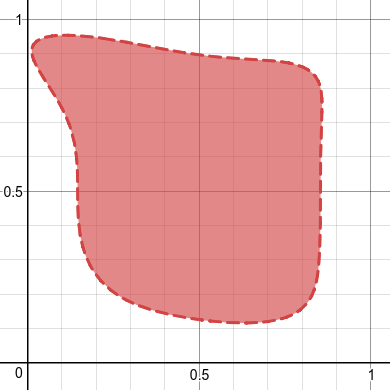

## The randu generator (infamous for its dependent random number sequence, proof is skipped)

$$
\begin{align*}
x_i &= ax_{i-1}\ (mod\ m) \\
u_i &= \frac{x_i}{m}
\end
{align*}
$$

where $a = 65539 = 2^{16} + 3\ and\ m = 2^{31}$

In [9]:
def randu(x):
    return linear_congruential_generator(x, pow(2, 16) + 3, 0, pow(2, 31))[:2]

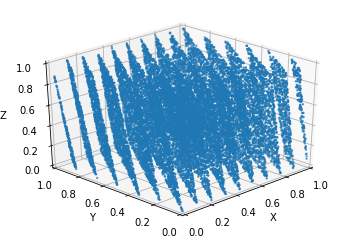

In [10]:
# For matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(azim=225)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Arguments for randu
datax = np.array([])
datay = np.array([])
dataz = np.array([])
x = 3
total_iterations = 20000

# Process
for i in range(total_iterations):
    u1, x = randu(x)
    u2, x = randu(x)
    u3, x = randu(x)
    datax = np.append(datax, u1)
    datay = np.append(datay, u2)
    dataz = np.append(dataz, u3)

ax.scatter(datax, datay, dataz, zdir='z', s=2)

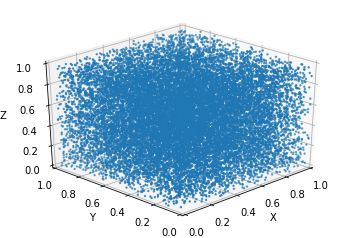

In [11]:
# For matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(azim=225)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Arguments for randu
datax = np.array([])
datay = np.array([])
dataz = np.array([])
x = 3
total_iterations = 20000

# Process
for i in range(total_iterations):
    u1, x = stdrand(x)
    u2, x = stdrand(x)
    u3, x = stdrand(x)
    datax = np.append(datax, u1)
    datay = np.append(datay, u2)
    dataz = np.append(dataz, u3)

ax.scatter(datax, datay, dataz, zdir='z', s=2)

## 9.1.2 Exponential and normal random numbers

see numpy.random.normal function

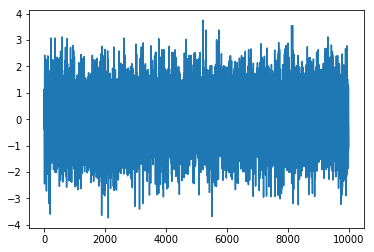

In [12]:
datax = np.array([])
for i in range(10000):
    u1 = np.random.normal()
    datax = np.append(datax, u1)
    
plt.plot(datax)

# 9.2 Monte Carlo Simulation

## 9.2.2 Quasi-random numbers

**base-p low-discrepancy sequence**

In [13]:
def halton(p, n):
    b = np.zeros(math.ceil(math.log(n + 1) / math.log(p)))
    u = np.zeros(n)
    for j in range(n):
        i = 0
        b[0] = b[0] + 1
        while b[i] > p - 1 + np.finfo(float).eps:
            b[i] = 0
            i += 1
            b[i] += 1 
        u[j] = 0
        for k in range(1, b.size + 1):
            u[j] = u[j] + b[k-1] * pow(p, -k)
    return u

In [14]:
# Example
print(halton(2, 8))
print(halton(3, 8))

[0.5    0.25   0.75   0.125  0.625  0.375  0.875  0.0625]
[0.33333333 0.66666667 0.11111111 0.44444444 0.77777778 0.22222222
 0.55555556 0.88888889]


### pseudo-random vs quasi-random

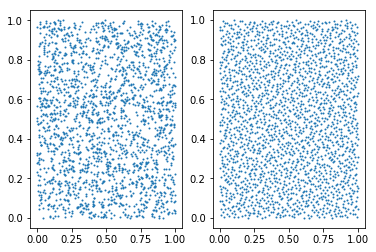

In [15]:
pair_count = 2000

pr_xdata = np.array([])
pr_ydata = np.array([])
qr_xdata = np.array([])
qr_ydata = np.array([])

qrx_seq = halton(2, pair_count)
qry_seq = halton(3, pair_count)

x = time.time()

for idx in range(pair_count):
    ux, x = stdrand(x) 
    uy, x = stdrand(x)
    pr_xdata = np.append(pr_xdata, ux)
    pr_ydata = np.append(pr_ydata, uy)
    qr_xdata = np.append(qr_xdata, qrx_seq[idx])
    qr_ydata = np.append(qr_ydata, qry_seq[idx])

plt.figure(1)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.subplot(121)
plt.plot(pr_xdata, pr_ydata, 'o', markersize=1)
plt.subplot(122)
plt.plot(qr_xdata, qr_ydata, 'o', markersize=1)

# 9.3 Discrete And Continuous Brownian Motion

## 9.3.1 Random walks

In [16]:
t = 10
w = 0
for i in range(t):
    if random.random() > 0.5:
        w += 1
    else:
        w -= 1

### Example

Use a Monte Carlo simulation to approximate the probability that the random walk exits the interval [-3, 6] through the top boundary 6

In [17]:
def random_walk(n, interval):
    lowerbound = interval[0]
    upperbound = interval[1]
    top_exits = 0
    avg_esc_time = 0
    for _ in range(n):
        w = 0
        l = 0
        while(True):
            if random.random() > 0.5:
                w += 1
            else:
                w -= 1
            l += 1
            if w == lowerbound:
                pass
                break
            elif w == upperbound:
                top_exits += 1
                break
        avg_esc_time += l
    return top_exits, avg_esc_time / n

interval = (-3, 6)
top_exit_100, _ = random_walk(100, interval)
top_exit_200, _ = random_walk(200, interval)
top_exit_400, _ = random_walk(400, interval)
top_exit_800, _ = random_walk(800, interval)
top_exit_1600, _ = random_walk(1600, interval)
top_exit_3200, _ = random_walk(3200, interval)
top_exit_6400, _ = random_walk(6400, interval)
top_exit_12800, _ = random_walk(12800, interval)
top_exit_25600, _ = random_walk(25600, interval)
output = lambda n, top_exit : print('n = %5d, top exits = %4d, prob = %f, error = %f' \
                                    %(n, top_exit, top_exit / n, abs(1 / 3 - top_exit / n)))

output(100, top_exit_100)
output(200, top_exit_200)
output(400, top_exit_400)
output(800, top_exit_800)
output(1600, top_exit_1600)
output(3200, top_exit_3200)
output(6400, top_exit_6400)
output(12800, top_exit_12800)
output(25600, top_exit_25600)

n =   100, top exits =   30, prob = 0.300000, error = 0.033333
n =   200, top exits =   75, prob = 0.375000, error = 0.041667
n =   400, top exits =  130, prob = 0.325000, error = 0.008333
n =   800, top exits =  287, prob = 0.358750, error = 0.025417
n =  1600, top exits =  554, prob = 0.346250, error = 0.012917
n =  3200, top exits = 1065, prob = 0.332813, error = 0.000521
n =  6400, top exits = 2054, prob = 0.320937, error = 0.012396
n = 12800, top exits = 4219, prob = 0.329609, error = 0.003724
n = 25600, top exits = 8459, prob = 0.330430, error = 0.002904


### Example 

Use a Monte Carlo simulation to estimate the escape time for a random walk escaping the interval [-3, 6]

In [18]:
interval = (-3, 6)
_, avg_esc_100 = random_walk(100, interval)
_, avg_esc_200 = random_walk(200, interval)
_, avg_esc_400 = random_walk(400, interval)
_, avg_esc_800 = random_walk(800, interval)
_, avg_esc_1600 = random_walk(1600, interval)
_, avg_esc_3200 = random_walk(3200, interval)
_, avg_esc_6400 = random_walk(6400, interval)
output = lambda n, avg_esc : print('n = %5d, average esc. time = %f, error = %f' \
                                    %(n, avg_esc, abs(18 - avg_esc)))

output(100, avg_esc_100)
output(200, avg_esc_200)
output(400, avg_esc_400)
output(800, avg_esc_800)
output(1600, avg_esc_1600)
output(3200, avg_esc_3200)
output(6400, avg_esc_6400)

n =   100, average esc. time = 20.200000, error = 2.200000
n =   200, average esc. time = 18.665000, error = 0.665000
n =   400, average esc. time = 17.035000, error = 0.965000
n =   800, average esc. time = 16.860000, error = 1.140000
n =  1600, average esc. time = 18.030625, error = 0.030625
n =  3200, average esc. time = 18.065938, error = 0.065938
n =  6400, average esc. time = 18.039062, error = 0.039062


# 9.4 Stochastic Differential Equations

## Definition

A set of random variables $x_t$ indexed by real numbers $t >= 0$ is called a **contimuous-time stochastic process**

## Brownian Motion

Source from http://scipy-cookbook.readthedocs.io/items/BrownianMotion.html

In [19]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

### Example

Solve the stochastic differential equation $dy(t) = rdt+\sigma B_t$ with initial condition $y(0) = y_0$

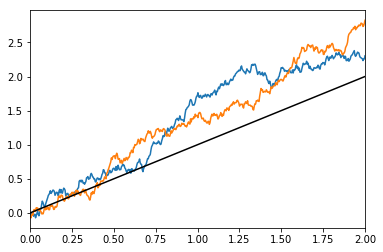

In [20]:
N = 500
xlim = 2.0

# For SDE
sigma = 0.3
r = 1
y0 = 0
X = np.linspace(0, xlim, N)

# For Brownian motion
dt = 0.1
delta = 0.3
B1 = brownian(y0, N, dt, delta)
B2 = brownian(y0, N, dt, delta)

# Process
Y = y0 + r * X
Y1 = y0 + r * X + sigma * B1
Y2 = y0 + r * X + sigma * B2
plt.xlim(0, 2)
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.plot(X, Y, color='black')

## Ito formula

If $y = f(t,x)$, then $dy = \frac{\partial{f}}{\partial{t}}(t,x)dt + \frac{\partial{f}}{\partial{x}}(t,x)dx + \frac{1}{2}\frac{\partial^2{f}}{\partial{x^2}}(t,x)dxdx$, where the $dxdx$ term is interpreted by using identities $dtdt = 0$, $dtdB_tdt = 0$, and $dB_tdB_t = dt$.

### Example

Show that geometric Brownian motion $y(t) = y_0e^{(r-\frac{1}{2}\sigma^2)t+\sigma B_t}$ <br>
satis

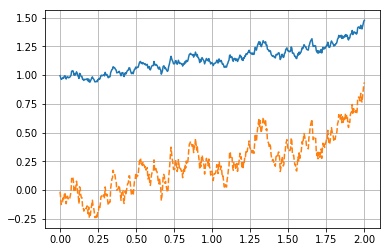

In [21]:
N = 500
xlim = 2.0
r = 0.1
sigma = 0.3
delta = 0.1
dt = 0.2
y0 = 1
X = np.linspace(0, xlim, N)

# For Brownian motion
B = brownian(0, N, dt, delta)

# Process
Y = y0 * np.exp((r - 0.5 * pow(sigma, 2)) * X + sigma * B)
plt.plot(X, Y)
plt.plot(X, B, linestyle = '--')
plt.grid(True)

## Euler-Maruyama Method

Given the SDE initial value problem

$\left\{\begin{matrix}
dy(t) & = & f(t,y)dt & + & g(t,y)dB_t \\ 
y(a) & = & y_a 
\end{matrix}\right.$

---

### $w_0 = y_0$

### $\mathbf{for}\ i = 0,1,2,\cdots$

### $\hspace{10mm} w_{i+1} = w_i + f(t_i,w_i)(\Delta t_i)+g(t_i,w_i)(\Delta B_i)$

### $\mathbf{end}$ 

### $where$

### $\hspace{10mm} \Delta t_i = t_{i+1} - t_i$

### $\hspace{10mm} \Delta B_i = B_{t_{i+1}} - B_{t_i}$

---

Each random number $\Delta B_i$ is computed by $\Delta B_i = z_i\sqrt{\Delta t_i}$ where $z_i$ is chosen from $N(0, 1)$

### Example

Once again, solve the stochastic differential equation $dy(t) = rdt+\sigma B_t$ with initial condition $y(0) = y_0$
by Euler-Maruyama method

---

The Euler-Maruyama Method has form

### $w_0 = y_0$

### $w_{i+1} = w_i + rw_i(\Delta t_i)+\sigma w_i (\Delta B_i)$

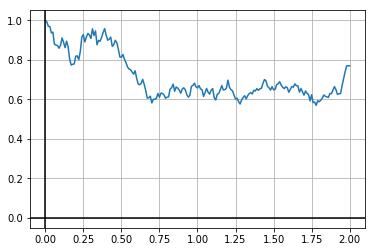

In [22]:
dt = 0.01
xlimit = 2
y0 = 1
r = 0.1
sigma = 0.3
times = np.arange(0, xlimit + dt, dt)
dB = np.random.standard_normal(times.size) * np.sqrt(dt)
ws = np.empty(times.size)
ws[0] = y0

for i in range(times.size - 1):
    ws[i + 1] = ws[i] + r * ws[i] * dt + sigma * ws[i] * dB[i]
    
# Plot the chart
plt.plot(times, ws)
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True, which='both')

### Example

Numerically solve the Langevin equation

$dy = -rydt + \sigma dB_t$

where $r$ and $\sigma$ are positive constants

---

Use the steps

### $w_0 = y_0$

### $w_{i+1} = w_i - rw_i(\Delta{t_i}) + \sigma (\Delta{B_i})$

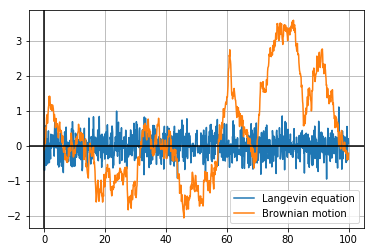

In [23]:
dt = 0.1
xlimit = 100
y0 = 0
r = 10
sigma = 1
delta = 0.5
times = np.arange(0, xlimit + dt, dt)
dB = np.random.standard_normal(times.size) * np.sqrt(dt)
ws = np.empty(times.size)
ws[0] = y0

for i in range(times.size - 1):
    ws[i + 1] = ws[i] - r * ws[i] * dt + sigma * dB[i]

# For Brownian motion realization
BM = brownian(0, times.size, dt, delta)
    
# Plot the chart
plt.plot(times, ws, label='Langevin equation')
plt.plot(times, BM, label='Brownian motion')
plt.axhline(y = 0, color='black')
plt.axvline(x = 0, color='black')
plt.grid(True, which='both')
plt.legend()

## Definition

An SDE solver has order m if the expected value of the error is of mth order in the step size; that is, if for any time $T$, $E\{|y(T) - w(T)|=O((\Delta t)^m)\}$ as the step size $\Delta{t} \rightarrow 0$

## Milstein Method

### $w_0 = y_0$

### $\mathbf{for}\ i = 0,1,2,\cdots$

### $\hspace{10mm} w_{i+1} = w_i + f(t_i,w_i)(\Delta{t_i}) + g(t_i,w_i)(\Delta{B_i})+\frac{1}{2}g(t_i,w_i)\frac{\partial{g}}{\partial{y}}(t_i,w_i)((\Delta{B_i})^2-\Delta{t_i})$

### $\mathbf{end}$

- The Milstein Method has order one
- The Euler-Maruyama Method has order $\frac{1}{2}$

### Example

Apply the Milstein Method to geometric Brownian motion

The equation is $dy = rydt + \sigma ydB_t$

with solution process $y = y_0e^{(r-\frac{1}{2}\sigma^2)t+\sigma B_t}$

---

### $w_0 = y_0$

### $w_{i+1} = w_i + rw_i\Delta{t}+\sigma w_i\Delta{B_i}+\frac{1}{2}\sigma^2w_i((\Delta{B_i})^2 - \Delta{t})$

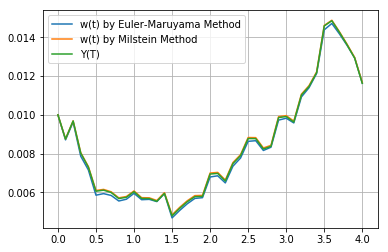

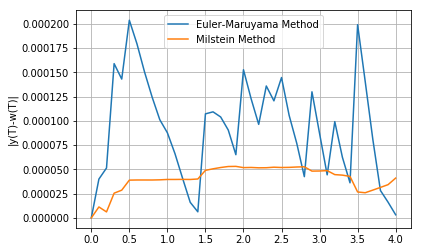

In [24]:
dt = 0.1
xlimit = 4
y0 = 1e-2
r = 0.1
sigma = 0.3
times = np.arange(0, xlimit + dt, dt)
dB = np.random.standard_normal(times.size) * np.sqrt(dt)

ws = np.empty(times.size)
ws[0] = y0  # For Euler-Maruyama Method
wms = np.empty(times.size)
wms[0] = y0 # For Milstein Method

for i in range(times.size - 1):
    # Euler-Maruyama
    ws[i + 1] = ws[i] + r * ws[i] * dt \
                      + sigma * ws[i] * dB[i]
    # Milstein
    wms[i + 1] = wms[i] + r * wms[i] * dt \
                        + sigma * wms[i] * dB[i] \
                        + 0.5 * pow(sigma, 2) * wms[i] * (pow(dB[i], 2) - dt)

# Calculate y(T)
tmp = dB
tmp[-1] = 0
B = np.cumsum(np.roll(tmp, 1))
f = lambda y0, sigma, t, B : y0 * np.exp((r - 0.5 * np.power(sigma, 2)) * t + sigma * B)
Y = f(y0, sigma, times, B)
    
# Plot the chart
plt.plot(times, ws, label='w(t) by Euler-Maruyama Method')
plt.plot(times, wms, label='w(t) by Milstein Method')
plt.plot(times, Y, label='Y(T)')
plt.grid(True, which='both')
plt.legend()
plt.show()

# Plot the chart
plt.ylabel('|y(T)-w(T)|')
plt.plot(times, np.abs(Y - ws), label='Euler-Maruyama Method')
plt.plot(times, np.abs(Y - wms), label='Milstein Method')
plt.grid(True, which='both')
plt.legend()
plt.show()

In [25]:
dts = np.array([
    pow(2, -1), pow(2, -2), pow(2, -3), pow(2, -4), pow(2, -5),
    pow(2, -6), pow(2, -7), pow(2, -8), pow(2, -9), pow(2, -10)
])
errs_em = np.empty(dts.size)
errs_m = np.empty(dts.size)
xlimit = 4
y0 = 1e-2
r = 0.1
sigma = 0.3

# For each dt
for i in range(Dts.size):
    dt = dts[i]
    times = np.arange(0, xlimit + dt, dt)
    dB = np.random.standard_normal(times.size) * np.sqrt(dt)
    ws = np.empty(times.size)
    ws[0] = y0  # For Euler-Maruyama Method
    wms = np.empty(times.size)
    wms[0] = y0 # For Milstein Method

    for j in range(times.size - 1):
        # Euler-Maruyama
        ws[j + 1] = ws[j] + r * ws[j] * dt \
                          + sigma * ws[j] * dB[j]
        # Milstein
        wms[j + 1] = wms[j] + r * wms[j] * dt \
                            + sigma * wms[j] * dB[j] \
                            + 0.5 * pow(sigma, 2) * wms[j] * (pow(dB[j], 2) - dt)
    # Calculate y(T)
    tmp = dB
    tmp[-1] = 0
    B = np.cumsum(np.roll(tmp, 1))
    f = lambda y0, sigma, t, B : y0 * np.exp((r - 0.5 * np.power(sigma, 2)) * t + sigma * B)
    Y = f(y0, sigma, times, B)
    
    errs_em[i] = abs(Y[-1] - ws[-1])
    errs_m[i] = abs(Y[-1] - wms[-1])
    
# Plot the chart
fig, ax = plt.subplots()
plt.xlabel('dt')
plt.ylabel('|y(T)-w(T)|')
xi = np.arange(dts.size)
plt.xticks(xi, dts)
plt.plot(xi, errs_em, label='Euler-Maruyama Method')
plt.plot(xi, errs_m, label='Milstein Method')
plt.grid(True, which='both')
plt.legend()
fig.autofmt_xdate()
plt.show()

NameError: name 'Dts' is not defined